# FLOWER CLUSTERING USING DEEP LEARNING

# Objective

A renowned botanist, Dr. Krupa, has been working on understanding the visual
characteristics that distinguish flower-species. While she has collected data on major flower
species, To assist her research, you’ve been tasked with building a AI model. Dr. Krupas’s
primary concern is that while you might be able to classify flowers into their main species
categories (e.g., Flower1, Flower2,..ect), Some tulips may have slight color variations or petal
shapes that aren't yet recognized as distinct varieties. Use a CNN Model to extract the features
and build a model to group the similar flowers. Prepare a report that includes steps followed to
build and finetuning of the model. Print the array of all classified flowers should be named
categories listed above.

# Import Necessary Modules

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Uploading Files

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 4-mds.zip to 4-mds.zip


In [ ]:
import zipfile
zip_path = '/content/4-mds.zip'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/4-mds')

# Check the extracted files
os.listdir('/content/4-mds')


['4-mds']

In [ ]:
dataset_path = '/content/4-mds/4-mds'
csv_path = '/content/4-mds/4-mds/flower_labels.csv' # store paths of csv and images

In [ ]:
df = pd.read_csv(csv_path)
print(df.head()) # The csv files

       file  label
0  0001.png      0
1  0002.png      0
2  0003.png      2
3  0004.png      0
4  0005.png      0


In [ ]:
!pip install matplotlib pillow


# Checking Image Presence

In [ ]:
from PIL import Image

In [ ]:
image_path = os.path.join(dataset_path, '0049.png')

# Load the image
image = Image.open(image_path)

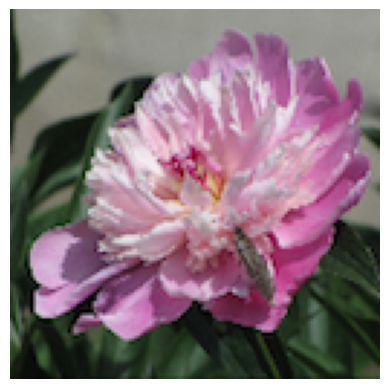

In [ ]:
plt.imshow(image)
plt.axis('off')  # Optional: Hide the axis
plt.show()


In [ ]:
files = os.listdir(dataset_path)

image_extensions = ['.png']
image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in image_extensions) # Count images

print(f"Total number of images: {image_count}")

Total number of images: 210


# Load Images

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#resize images
def load_images(df, img_folder, target_size=(128, 128)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img_path = os.path.join(img_folder, row['file'])
        image = load_img(img_path, target_size=target_size)
        image = img_to_array(image) / 255.0  # Normalize image
        images.append(image)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images(df, dataset_path)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train) # train test split
y_test = to_categorical(y_test)


# Building Model

In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 853ms/step - accuracy: 0.1731 - loss: 2.4230 - val_accuracy: 0.2381 - val_loss: 2.2768
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2488 - loss: 2.1941 - val_accuracy: 0.3333 - val_loss: 2.1016
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2546 - loss: 2.0241 - val_accuracy: 0.3571 - val_loss: 2.0713
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3491 - loss: 1.8966 - val_accuracy: 0.3810 - val_loss: 1.8436
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4169 - loss: 1.6655 - val_accuracy: 0.5714 - val_loss: 1.5975
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5374 - loss: 1.3586 - val_accuracy: 0.5952 - val_loss: 1.2608
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6487 - loss: 1.0908 - val_accuracy: 0.6190 - val_loss: 1.1362
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6340 - loss: 1.0425 - val_accuracy: 0.5714 - val_loss: 1.161

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5630 - loss: 0.9826 
Test Accuracy: 0.5476190447807312


***A fairly avg accuracy was recieved***

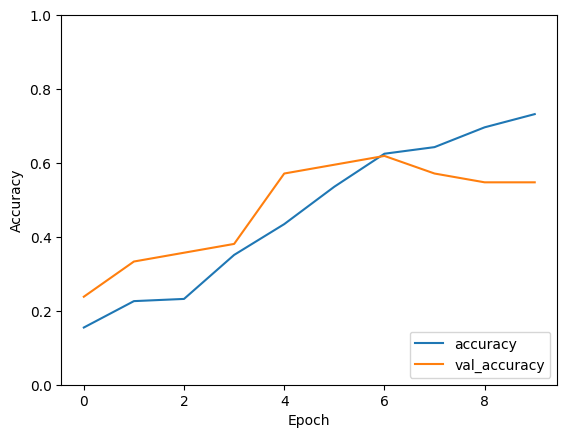

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Get predictions for test set
y_pred = model.predict(x_test)
predicted_classes = np.argmax(y_pred, axis=1)
print("Predicted Classes (Indexes):", predicted_classes)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted Classes (Indexes): [4 5 8 4 2 6 4 8 8 8 8 8 4 2 1 1 2 4 1 2 4 6 4 8 1 8 8 4 8 7 1 4 2 8 6 8 8
 4 7 5 4 7]


In [ ]:
flower_categories = {
    0: "Flower1",
    1: "Flower2",
    2: "Flower3",
    3: "Flower4",
    4: "Flower5",
    5: "Flower6",
    6: "Flower7",
    7: "Flower8",
    8: "Flower9",
    9: "Flower10"
}

# Convert numerical predictions to flower category names
predicted_flower_names = [flower_categories[pred] for pred in predicted_classes]
print("Predicted Flower Names:", predicted_flower_names)


Predicted Flower Names: ['Flower5', 'Flower6', 'Flower9', 'Flower5', 'Flower3', 'Flower7', 'Flower5', 'Flower9', 'Flower9', 'Flower9', 'Flower9', 'Flower9', 'Flower5', 'Flower3', 'Flower2', 'Flower2', 'Flower3', 'Flower5', 'Flower2', 'Flower3', 'Flower5', 'Flower7', 'Flower5', 'Flower9', 'Flower2', 'Flower9', 'Flower9', 'Flower5', 'Flower9', 'Flower8', 'Flower2', 'Flower5', 'Flower3', 'Flower9', 'Flower7', 'Flower9', 'Flower9', 'Flower5', 'Flower8', 'Flower6', 'Flower5', 'Flower8']


In [ ]:
# Display the classification results for 10 images
for i, pred in enumerate(predicted_classes[:10]):
    print(f"Image {i+1} is classified as: {flower_categories[pred]}")



Image 1 is classified as: Flower5
Image 2 is classified as: Flower6
Image 3 is classified as: Flower9
Image 4 is classified as: Flower5
Image 5 is classified as: Flower3
Image 6 is classified as: Flower7
Image 7 is classified as: Flower5
Image 8 is classified as: Flower9
Image 9 is classified as: Flower9
Image 10 is classified as: Flower9


# Grouping all images

In [ ]:
from collections import Counter

# Count occurrences of each flower category in the entire dataset
predicted_flower_counts = Counter([flower_categories[pred] for pred in predicted_classes])

# Print the count of each flower category
for flower, count in predicted_flower_counts.items():
    print(f"{flower}: {count} time(s)")


Flower4: 6 time(s)
Flower6: 9 time(s)
Flower9: 3 time(s)
Flower8: 5 time(s)
Flower5: 4 time(s)
Flower7: 4 time(s)
Flower1: 3 time(s)
Flower3: 3 time(s)
Flower2: 4 time(s)
Flower10: 1 time(s)


 ***This is from test set that is 0.2 * 210 = 42 images***

# Fine Tuning the model for better accuracy

### 1) Including Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to the training data
datagen.fit(x_train)


In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // 32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4669 - loss: 1.5436 - val_accuracy: 0.5238 - val_loss: 1.2326
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6875 - loss: 1.2625 - val_accuracy: 0.5476 - val_loss: 1.1999
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5253 - loss: 1.3384 - val_accuracy: 0.6190 - val_loss: 1.0622
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 1.3732 - val_accuracy: 0.6190 - val_loss: 1.0840
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5481 - loss: 1.2734 - val_accuracy: 0.6190 - val_loss: 1.1199
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4375 - loss: 1.5869 - val_accuracy: 0.5952 - val_loss: 1.1076
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6330 - loss: 1.1667 - val_accuracy: 0.6190 - val_loss: 1.0202
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4688 - loss: 1.2694 - val_accuracy: 0.6429 - val_loss: 0.9978
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5782 - loss: 1.0317 - val_accuracy: 0.7143 - val_loss: 0.9480
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5312 - loss: 1.0538 - val_accuracy: 0.7381 - val_loss: 0.9560


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7525 - loss: 0.9364
Test Accuracy: 0.738095223903656


### 2) Including L2 regularisation

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()

# First Convolutional Layer with L2 Regularization
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer with L2 Regularization
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer with L2 Regularization
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // 32)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 902ms/step - accuracy: 0.1715 - loss: 6.2018 - val_accuracy: 0.1429 - val_loss: 4.9445
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1250 - loss: 4.9701 - val_accuracy: 0.1190 - val_loss: 4.7841
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1451 - loss: 4.6187 - val_accuracy: 0.0952 - val_loss: 4.1950
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0625 - loss: 4.2133 - val_accuracy: 0.0952 - val_loss: 4.1031
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1485 - loss: 3.9519 - val_accuracy: 0.0952 - val_loss: 3.8023
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1562 - loss: 3.7408 - val_accuracy: 0.1429 - val_loss: 3.7376
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1874 - loss: 3.6040 - val_accuracy: 0.2619 - val_loss: 3.4535
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3750 - loss: 3.4887 - val_accuracy: 0.2381 - val_loss: 3.3954

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2054 - loss: 3.0919 
Test Accuracy: 0.2142857164144516


# 3) Hyperparameter tuning - Adjusting learning rate

In [ ]:
from tensorflow.keras.optimizers import Adam

# Try different learning rates
optimizer = Adam(learning_rate=1.0)  # You can adjust this value

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.2054 - loss: 3.0919
Test Accuracy: 0.2142857164144516


In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // 32)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 553ms/step - accuracy: 0.1062 - loss: 2.5190 - val_accuracy: 0.1429 - val_loss: 2.3182
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1250 - loss: 2.2813 - val_accuracy: 0.1190 - val_loss: 2.2992
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.1313 - loss: 2.2707 - val_accuracy: 0.2619 - val_loss: 2.2292
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5000 - loss: 2.1502 - val_accuracy: 0.2619 - val_loss: 2.2260
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1982 - loss: 2.1457 - val_accuracy: 0.2143 - val_loss: 2.2701
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2812 - loss: 1.9829 - val_accuracy: 0.1905 - val_loss: 2.3051
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.2913 - loss: 2.0944 - val_accuracy: 0.2143 - val_loss: 1.9294
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2812 - loss: 1.9205 - val_accuracy: 0.1905 - val_loss: 1.9148
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2541 - loss: 1.8553 - val_accuracy: 0.3333 - val_loss: 1.8426
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3750 - loss: 1.7963 - val_accuracy: 0.3571 - val_loss: 1.8213


***Clearly higher accuracy obtained before completing epoch***

# 4) Model Checkpoints and Early Stopping

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model based on validation accuracy
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Stop training early if no improvement in validation accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,  # Increase epochs
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // 32,
                    callbacks=[checkpoint, early_stopping])


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3935 - loss: 1.7218 - val_accuracy: 0.4286 - val_loss: 1.7578
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3750 - loss: 1.6598 - val_accuracy: 0.4286 - val_loss: 1.7243
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4089 - loss: 1.6052 - val_accuracy: 0.4048 - val_loss: 1.5370
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3438 - loss: 1.8194 - val_accuracy: 0.4048 - val_loss: 1.5695


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4261 - loss: 1.5418
Test Accuracy: 0.4047619104385376


# Predicting on random Image

In [ ]:
uploaded = files.upload()
image_filename = next(iter(uploaded))

Saving download.jpg to download.jpg


In [ ]:
def preprocess_image(image_path, target_size=(128, 128)):
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image


preprocessed_image = preprocess_image(image_filename)

In [ ]:
prediction = model.predict(preprocessed_image)
predicted_class_index = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step


In [ ]:
categories = ['Flower1', 'Flower2', 'Flower3', 'Flower4', 'Flower5', 'Flower6', 'Flower7', 'Flower8', 'Flower9', 'Flower10']
predicted_category = categories[predicted_class_index]
print(f'The uploaded image is classified as: {predicted_category}')


The uploaded image is classified as: Flower9
